# Tarea 1
Javier Tello

In [5]:
from pylab import *
%matplotlib inline

# 1.-

Sabemos que en general 

$$
\vec y(\vec x, t) = \vec y(x_0,t_0) + \int_ i^f\! \vec f( \vec y , t) dt
$$

con i el tiempo inicial $t_0$, f el tiempo final, $\vec y(x_0,t_0)$ la posición inicial y $\vec f( \vec y , t)$ la derivada de $\vec y$. Lo que estos métodos hacen es usar la expansión de taylor de $\vec f$ de diferentes maneras para aproximar $\vec f$. Esto hace más fácil la integración, la cual se hace en pequeños intervalos de integración. Si estos son suficientemente pequeños se puede hacer un método iterativo donde a cada punto se le añade su incremento multiplicado por el paso y esto aproxima la integral. Al hacer el método iterativo 

$$
\vec y(\vec x_ {n+1}, t_ {n+1}) = \vec y(x_n,t_n) + \int_ i^f\! \vec f( \vec y_n , t_n) dt
$$

Para cada método aproximaremos $\vec f$ de una manera diferente. 

# Euler

Aquí aproximaremos $\vec f$ a su primer término en la serie de Taylor alrededor de t=0. Esto es

$$
\vec f( \vec y , t+h) = \vec f( \vec y_0, t_0) + O(h)
$$

Y así, la ecuación de arriba se vuelve

$$
\vec y = y( \vec x_0, t_0) + \int_ 0^h\! \vec f( \vec y_0 , t_0) dt = y( \vec x_0, t_0) + h\vec f( \vec y_0 , t_0) + O(h^2)
$$

Haciendo esto para un paso de integración h se puede programar lo siguiente

In [3]:
def euler(func,p_ini,t,h=0.1):
    tiempos = arange(t[0],t[1]+h,h)
    sol = zeros((len(tiempos),len(p_ini)))
    sol[0,:] = p_ini 
    for i in xrange(len(tiempos)-1):
        sol[i+1,:] = sol[i,:] + func(sol[i,:],tiempos[i])*h
    return tiempos,sol

# Taylor a segundo orden

Haciendo la misma serie de Taylor anterior pero a un orden más se obtiene

$$
\vec f( \vec y , t+h) = \vec f( \vec y_0, t_0) + t\vec f'( \vec y_0, t_0) + O(h^2)
$$

Y regresando a la primer ecuación se obtiene 

$$
\vec y = y( \vec x_0, t_0) + h\vec f( \vec y_0 , t_0) + \frac {h^2}{2}\vec f'( \vec y_0, t_0) + O(h^3)
$$

Por otro lado, sabemos que

$$
\vec f'( \vec y, t) = \frac{d\vec f(\vec y,t)}{dt} = \frac{\delta \vec f}{\delta t} + \frac{\delta \vec f}{\delta \vec y} \frac{\delta \vec y}{\delta t} = \frac{\delta \vec f}{\delta t} + \frac{\delta \vec f}{\delta \vec y} \vec f
$$

Finalmente obtenemos

$$
\vec y = y( \vec x_0, t_0) + h\vec f( \vec y_0 , t_0) + \frac {h^2}{2} \left ( \frac{\delta \vec f}{\delta t} + \frac{\delta \vec f}{\delta \vec y} \vec f \right ) + O(h^3)
$$

Donde en realidad $\frac{\delta \vec f}{\delta \vec y}$ es el jacobiano. 

In [4]:
def T2(ec,d_f,p_ini,t,h=0.1):
    tiemp = arange(t[0],t[1]+h,h)
    sol = zeros((len(tiemp),len(p_ini)))
    sol[0,:] = p_ini 
    for i in xrange(len(tiemp)-1):
        f = ec(sol[i,:],tiemp[i])
        dv,jac = d_f(sol[i,:],tiemp[i])
        sol[i+1,:] = sol[i,:] + f*h + 0.5*h*h*( dot(f,jac) + dv)
    return tiemp,sol

# Runge-Kutta de segundo orden

Viendo la primer ecuación, podemos notar que si el intervalo es simétrico y se integra un término de la serie de Taylor con exponente impar, este se cancelará. Como los intervalos temporales son de longitud h, pondremos la serie de Taylor de primer orden alrededor de $\vec y(x_0,t_0 + h/2)$

$$
\vec f( \vec y , t+h) = \vec f( \vec y_0 + \frac{h}{2} \vec f(\vec y_0,t_0), t_0 + \frac{h}{2}) + t\vec f'( \vec y_0 + \frac{h}{2} \vec f(\vec y_0,t_0), t_0 + \frac{h}{2}) + O(h^2)
$$

Así el término lineal se cancela y queda de la primer ecuación

$$
\vec y = y( \vec x_0, t_0) + h\vec f( \vec y_0 + \frac{h}{2} \vec f(\vec y_0,t_0), t_0 + \frac{h}{2}) + O(h^3)
$$

Donde el término $\vec y_0 + \frac{h}{2} \vec f(\vec y_0,t_0)$ es la integral de la expansión de Taylor a primer orden de $\vec y(x_0,t_0 + h/2)$. Es como si usáramos Euler para esto.

In [5]:
def rk2(ec,p_ini,t,h=0.1):
    tiemp = arange(t[0],t[1]+h,h)
    sol = zeros((len(tiemp),len(p_ini)))
    sol[0,:] = p_ini
    for i in xrange(len(tiemp)-1):
        k = h*ec(sol[i,:],tiemp[i])
        sol[i+1,:] = sol[i,:] + h*ec(sol[i,:]+0.5*k,tiemp[i]+0.5*h)
    return tiemp,sol

# Runge-Kutta de cuarto orden

Haciendo el mismo desarrollo anterior, pero tomando dos términos más de la serie de Taylor se puede llegar a la expresión de cuarto orden de Runge Kutta.
$$
\vec y = y( \vec x_0, t_0) + \frac {h}{6} \left ( k_1 + 2k_2 + 2k_3 + k_4 \right ) + O(h^5)
$$
donde
$$
k_1 = \vec f (\vec x_0, t_0)
$$
$$
k_2 = \vec f (\vec x_0 + (h/2)k_1 , t_0 + h/2)
$$
$$
k_3 = \vec f (\vec x_0 + (h/2)k_2 , t_0 + h/2)
$$
$$
k_4 = \vec f (\vec x_0 + hk_3 , t_0 + h)
$$

In [6]:
def rk4(ec,p_ini,x,h=0.1):
    tiempos = arange(x[0],x[1]+h,h)
    sol = zeros((len(tiempos),len(p_ini)))
    sol[0,:] = p_ini
    for i in xrange(len(tiempos)-1):
        k1 = ec(sol[i,:],tiempos[i])
        k2 = ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h)
        k3 = ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h)
        k4 = ec(sol[i,:]+h*k3,tiempos[i]+h)
        sol[i+1,:] = sol[i,:] + (h/6.)*(k1+2*k2+2*k3+k4)
        
    return tiempos,sol

Dada la ecuación de la tarea podemos llegar a un sistema de ecuaciones diferenciales de primer orden y resolver con estos métodos. 

$$
x'' + 0.5 x' + sin( x) = exp(-t)sin(3t)
$$

$$
dx = u
$$
$$
du = u' = x'' = -0.5 x' - sin( x) + exp(-t)sin(3t)
$$

El sistema de ecuaciones está programado en ec1 y su derivada con respecto a t y con respecto a $\vec x$ están en d_ec1.

In [7]:
def ec1(x,t):
    dx = x[1]
    du = -(0.5)*x[1] - sin(x[0]) + exp(-t)*sin(3*t)
    return array([dx,du])

def d_ec1(x,t):
    return array([0,exp(-t)*cos(3*t)-t*exp(-t)*sin(3*t)]),array([[0,1],[-cos(x[0]),-0.5]])

Y con cada uno de los métodos la solución es la siguiente.

Euler

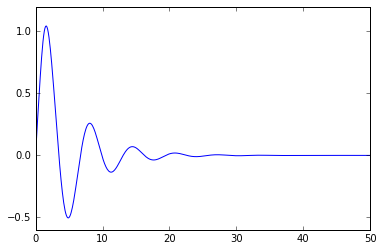

In [8]:
t,sol = euler(ec1,[0,1],[0,50])
plot(t,sol[:,0])
show()

Taylor segundo orden

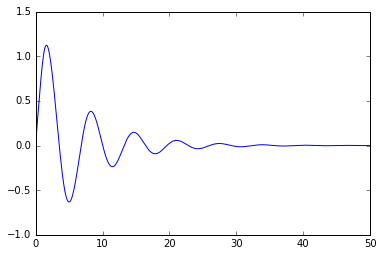

In [9]:
t,sol = T2(ec1,d_ec1,[0,1],[0,50])
plot(t,sol[:,0])
show()

Rungen Kutta segundo orden

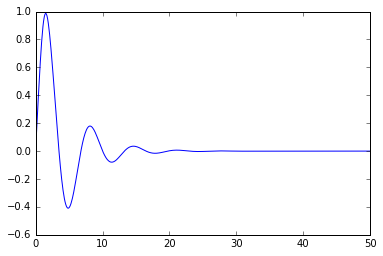

In [10]:
t,sol = rk2(ec1,[0,1],[0,50])
plot(t,sol[:,0])
show()

Rungen Kutta cuarto orden

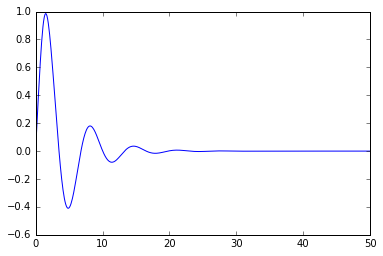

In [11]:
t,sol = rk4(ec1,[0,1],[0,50])
plot(t,sol[:,0])
show()

# 2.-

Sea 

$$
y''' + y''^2 - 3 y'^3 + cos^2( y) = exp(-t)sin(3t)
$$

Entonces llegamos al sistema de ecuaciones

$$
 y' = v
$$
$$
 v' = u
$$
$$
 u' =  y''' = - y´´^2 + 3 y'^3 - cos^2( y) + exp(-t)sin(3t)
$$

In [2]:
def ec2(x,t):
    dx = x[1]
    dv = x[2]
    du = -x[2]**2 + 3*(x[1]**3) - (cos(x[0]))**2 + exp(-t)*sin(3*t)
    return array([dx,dv,du])

def d_ec2(x,t):
    return array([0,0,exp(-t)*cos(3*t)-t*exp(-t)*sin(3*t)]),array([[0,1,0],[0,0,1],[2*cos(x[0])*sin(x[0]),9*(x[1]**2),-2*x[2]]])

Y la solución con cada uno de los métodos es:

Euler
Vemos que para el intervalo entre 1 y 2 se puede hacer con un paso de integración tan chico como 0.02. Cuando se hace con 0.01 diverge a menos infinito.

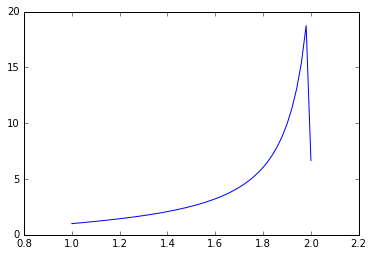

In [13]:
t,sol = euler(ec2,[1,2,1],[1,2],0.02)
plot(t,sol[:,0])
show()

Para el intervalo de 1 a 2.1 el paso mínimo es de 0.05. Después diverge de nuevo a menos infinto. 

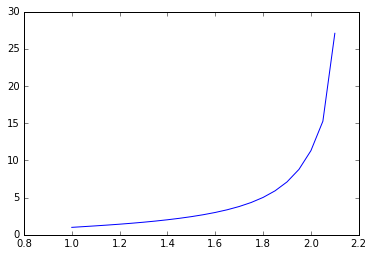

In [14]:
t,sol = euler(ec2,[1,2,1],[1,2.1],0.05)
plot(t,sol[:,0])
show()

Taylor 2

De 1 a 2 el paso mínimo es de 0.29 antes de que diverga a menos infinito, aunque igual parece diverger a infinito con este paso y menores.

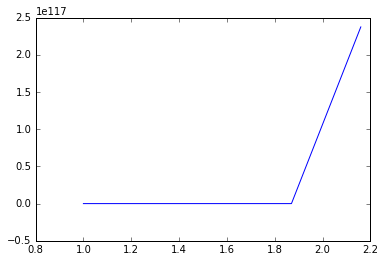

In [15]:
t,sol = T2(ec2,d_ec2,[1,2,1],[1,2],0.29)
plot(t,sol[:,0])
show()

Para el intervalo entre 1 y 2.1 se obtiene exactamente el mismo valor antes de que diverga a menos infinito. 

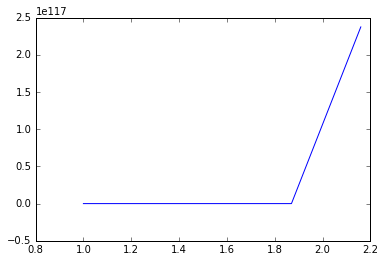

In [16]:
t,sol = T2(ec2,d_ec2,[1,2,1],[1,2.1],0.29)
plot(t,sol[:,0])
show()

Rungen Kutta 2

Aquí desde el paso 0.3 empieza a diverger hacia menos infinito. Aunque vemos que para los primeros tres pasos se parece a la solución que da Euler. Para el segundo intervalo será lo mismo, ya que el paso es más grande que el cambio en el intervalo.

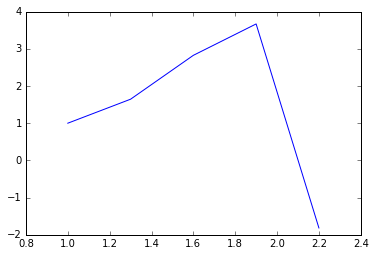

In [17]:
t,sol = rk2(ec2,[1,2,1],[1,2],0.3)
plot(t,sol[:,0])
show()

Runge Kutta 4

Para este desde pasos de 1 empieza a bajar. El mejor paso no está claro. 

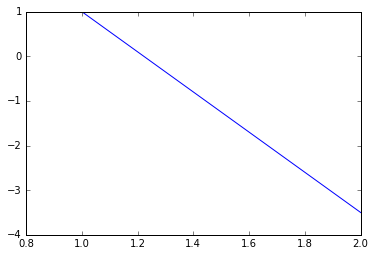

In [18]:
t,sol = rk4(ec2,[1,2,1],[1,2],1)
plot(t,sol[:,0])

Lo que está pasando es que cerca de 2 la solución diverge. Graficar hasta 2.1 puede funcionar para algunos métodos porque el paso de integración se salta la singularidad, pero en realidad esto ya no representa nada. Después del punto en el cual diverge ya no podemos saber nada. 

Ahora programaremos los integradores para parar cuando la solución empiece a diverger. 

Vemos primero que Euler logra llegar hasta 1.973 hasta empezar a diverger con $h = 10*10^-7$

In [6]:
def euler_d(func,p_ini,t,h=0.01):
    tiempos = arange(t[0],t[1]+h,h)
    sol = zeros((len(tiempos),len(p_ini)))
    sol[0,:] = p_ini 
    for i in xrange(len(tiempos)-1):
        sol[i+1,:] = sol[i,:] + func(sol[i,:],tiempos[i])*h
        if abs(sol[i+1,0]) > 200:
            print sol[i,:]
            print sol[i+1,:]
            print tiempos[i]
            break
    return tiempos,sol

[  5.24502858e+01  -9.16441551e+08  -8.39812879e+22]
[ -9.11196522e+03  -8.39812880e+17  -7.05285672e+40]
1.95483000001


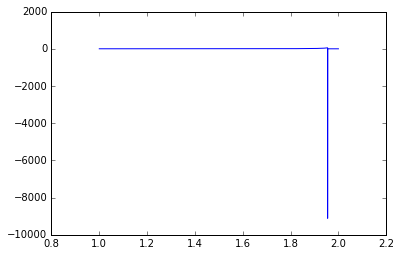

In [37]:
t,sol = euler_d(ec2,[1,2,1],[1,2],1e-5)
plot(t,sol[:,0])

[  1.99998058e+02   2.99661170e+04   8.98453208e+06]
[  2.00001055e+02   2.99670154e+04   8.98493616e+06]
1.97337220057


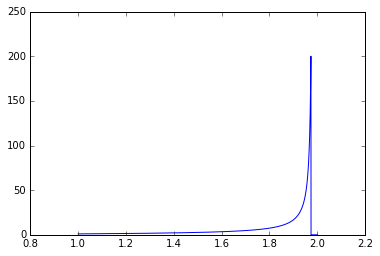

In [11]:
t,sol = euler_d(ec2,[1,2,1],[1,2],1e-7)
plot(t,sol[:,0])

In [12]:
def T2_d(ec,d_f,p_ini,t,h=0.1):
    tiemp = arange(t[0],t[1]+h,h)
    sol = zeros((len(tiemp),len(p_ini)))
    sol[0,:] = p_ini 
    for i in xrange(len(tiemp)-1):
        f = ec(sol[i,:],tiemp[i])
        dv,jac = d_f(sol[i,:],tiemp[i])
        sol[i+1,:] = sol[i,:] + f*h + 0.5*h*h*( dot(f,jac) + dv)
        if abs(sol[i+1,0]) > 200:
            print sol[i,:]
            print sol[i+1,:]
            print tiemp[i]
            break
    return tiemp,sol

[  1.09969916e+01   1.38899044e+06   6.20457440e+04]
[ -2.83679536e+03   1.74489804e+19   3.89495602e+12]
1.85215050012


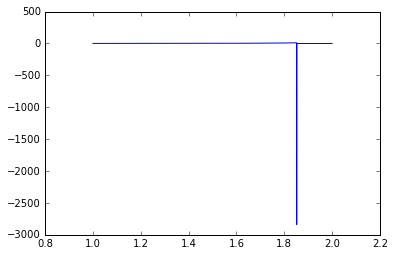

In [42]:
t,sol = T2_d(ec2,d_ec2,[1,2,1],[1,2],0.5e-6)
plot(t,sol[:,0])
show()

In [16]:
def rk2_d(ec,p_ini,t,h=0.1):
    tiemp = arange(t[0],t[1]+h,h)
    sol = zeros((len(tiemp),len(p_ini)))
    sol[0,:] = p_ini
    for i in xrange(len(tiemp)-1):
        k = h*ec(sol[i,:],tiemp[i])
        sol[i+1,:] = sol[i,:] + h*ec(sol[i,:]+0.5*k,tiemp[i]+0.5*h)
        if abs(sol[i+1,0]) > 200:
            print sol[i,:]
            print sol[i+1,:]
            print tiemp[i]
            break
    return tiemp,sol

[  4.38147915e+01  -1.32258174e+11  -1.74922247e+27]
[ -8.74611236e+16  -1.52988963e+44  -2.34056227e+93]
1.95124000001


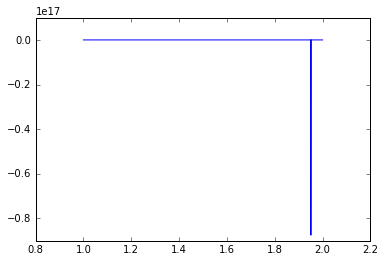

In [41]:
t,sol = rk2_d(ec2,[1,2,1],[1,2],1e-5)
plot(t,sol[:,0])
show()

[  1.49038703e+02  -2.88622983e+06  -1.68520730e+19]
[ -2.10636153e+06  -3.54990454e+25  -2.52036446e+57]
1.97109150014


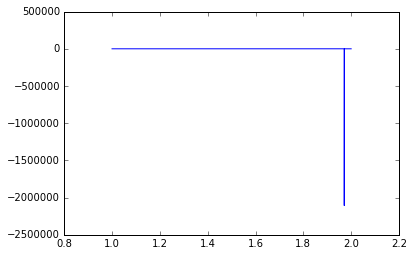

In [20]:
t,sol = rk2_d(ec2,[1,2,1],[1,2],0.5e-6)
plot(t,sol[:,0])
show()

In [21]:
def rk4_d(ec,p_ini,x,h=0.1):
    tiempos = arange(x[0],x[1]+h,h)
    sol = zeros((len(tiempos),len(p_ini)))
    sol[0,:] = p_ini
    for i in xrange(len(tiempos)-1):
        k1 = ec(sol[i,:],tiempos[i])
        k2 = ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h)
        k3 = ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h)
        k4 = ec(sol[i,:]+h*k3,tiempos[i]+h)
        sol[i+1,:] = sol[i,:] + (h/6.)*(k1+2*k2+2*k3+k4)
        if abs(sol[i+1,0]) > 200:
            print sol[i,:]
            print sol[i+1,:]
            print tiempos[i]
            break
    return tiempos,sol

[  1.25778027e+02   1.12297278e+04  -7.65542713e+08]
[ -7.06703443e+03  -3.10416038e+20  -5.78148700e+47]
1.96945299992


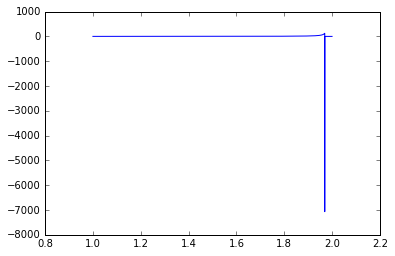

In [22]:
t,sol = rk4_d(ec2,[1,2,1],[1,2],1e-6)
plot(t,sol[:,0])

[  5.85889188e+01  -2.21465193e+05  -2.99683883e+16]
[ -1.68039859e+039  -1.69424366e+089  -1.72227694e+184]
1.95729000001


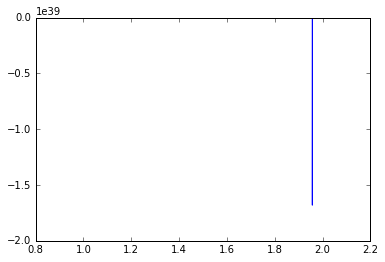

In [33]:
t,sol = rk4_d(ec2,[1,2,1],[1,2],1e-5)
plot(t,sol[:,0])

[  4.63171168e+01  -6.11918664e+05  -1.12652875e+17]
[ -1.07368741e+043  -1.72920697e+096  -8.97047028e+197]
1.95124


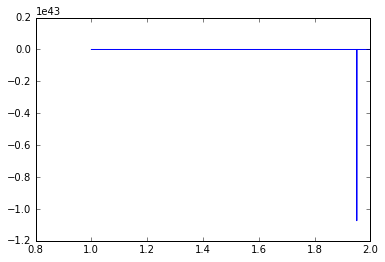

In [35]:
t,sol = rk4_d(ec2,[1,2,1],[1,2],0.2e-4)
plot(t,sol[:,0])

Vemos que después de 1.95 ya no cambia mucho la solución dependiendo de h, entonces para no variar en Euler y en RK2 la h mínima es alrededor de 10^-5, para RK4 es alrededor de 0.2*10^-4 y para Taylor 2 es algo menor a 0.5*10^-6. 

# 3.-

Se pueden adaptar los métodos anteriores para que pasen argumentos de la siguiente manera.

In [ ]:
def euler_a(func,p_ini,t,arg=0,h=0.1):
    tiempos = arange(t[0],t[1]+h,h)
    sol = zeros((len(tiempos),len(p_ini)))
    sol[0,:] = p_ini
    if arg==0:
        for i in xrange(len(tiempos)-1):
            sol[i+1,:] = sol[i,:] + func(sol[i,:],tiempos[i])*h
    else:
        for i in xrange(len(tiempos)-1):
            sol[i+1,:] = sol[i,:] + func(sol[i,:],tiempos[i],arg)*h
    return tiempos,sol

In [ ]:
def T2_a(ec,d_f,p_ini,t,arg=0,h=0.1):
    tiemp = arange(t[0],t[1]+h,h)
    sol = zeros((len(tiemp),len(p_ini)))
    sol[0,:] = p_ini 
    if arg==0:
        for i in xrange(len(tiemp)-1):
            f = ec(sol[i,:],tiemp[i])
            dv,jac = d_f(sol[i,:],tiemp[i])
            sol[i+1,:] = sol[i,:] + f*h + 0.5*h*h*(dot(f,jac) + dv)
    else:
        for i in xrange(len(tiemp)-1):
            f = ec(sol[i,:],tiemp[i],arg)
            dv,jac = d_f(sol[i,:],tiemp[i],arg)
            sol[i+1,:] = sol[i,:] + f*h + 0.5*h*h*(dot(f,jac) + dv)
    return tiemp,sol

In [ ]:
def rk2_a(ec,p_ini,t,arg=0,h=0.1):
    tiemp = arange(t[0],t[1]+h,h)
    sol = zeros((len(tiemp),len(p_ini)))
    sol[0,:] = p_ini
    if arg==0:
        for i in xrange(len(tiemp)-1):
            k = h*ec(sol[i,:],tiemp[i])
            sol[i+1,:] = sol[i,:] + h*ec(sol[i,:]+0.5*k,tiemp[i]+0.5*h)
    else:
        for i in xrange(len(tiemp)-1):
            k = h*ec(sol[i,:],tiemp[i],arg)
            sol[i+1,:] = sol[i,:] + h*ec(sol[i,:]+0.5*k,tiemp[i]+0.5*h,arg)
    return tiemp,sol

In [ ]:
def rk4_a(ec,p_ini,x,args=0,h=0.01):
    tiempos = arange(x[0],x[1]+h,h)
    sol = zeros((len(tiempos),len(p_ini)))
    sol[0,:] = p_ini
    if args==0:
        for i in xrange(len(tiempos)-1):
            k1 = ec(sol[i,:],tiempos[i])
            k2 = ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h)
            k3 = ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h)
            k4 = ec(sol[i,:]+h*k3,tiempos[i]+h)
            sol[i+1,:] = sol[i,:] + (h/6.)*(k1+2*k2+2*k3+k4)
    else:
        for i in xrange(len(tiempos)-1):
            k1 = ec(sol[i,:],tiempos[i],args)
            k2 = ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h,args)
            k3 = ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h,args)
            k4 = ec(sol[i,:]+h*k3,tiempos[i]+h,args)
            sol[i+1,:] = sol[i,:] + (h/6.)*(k1+2*k2+2*k3+k4)

    return tiempos,sol

Y la ecuación a resolver es

$$
\vec x'' + 0.1\vec x' + 4sin(\vec x) = (1/2)sin(wt)
$$

In [ ]:
def ec_3(x,t,w=1):
    dx = x[1]
    du = -0.1*x[1] - 4*sin(x[0]) + 0.5*sin(w*t)
    return array([dx,du])

def d_ec_3(x,t,w=1):
    return array([0,0.5*w*sin(w*t)]),array([[0,1],[-4*cos(x[0]),0.1]])

Y ahora graficaremos las soluciones con:

Euler

In [ ]:
w=arange(1,3.1,0.1)
for i in w:
    t,sol = euler_a(ec_3,[0,1],[0,10],i)
    plot(t,sol[:,0])

Taylor segundo orden

In [ ]:
w=arange(1,3.1,0.1)
for i in w:
    t,sol = T2_a(ec_3,d_ec_3,[0,1],[0,10],i,)
    plot(t,sol[:,0])

Vemos que esta solución no se parece a la anterior. Sin embargo, si se hace más pequeño el paso de integración obtenemos una similar.

In [ ]:
w=arange(1,3.1,0.1)
for i in w:
    t,sol = T2_a(ec_3,d_ec_3,[0,1],[0,10],i,0.01)
    plot(t,sol[:,0])

Runge Kutta segundo orden

In [ ]:
w=arange(1,3.1,0.1)
for i in w:
    t,sol = rk2_a(ec_3,[0,1],[0,10],i)
    plot(t,sol[:,0])

Runge Kutta cuarto orden

In [ ]:
w=arange(1,3.1,0.1)
for i in w:
    t,sol = rk4_a(ec_3,[0,1],[0,10],i)
    plot(t,sol[:,0])

Si graficamos hasta $t_f = 150$ vemos que las soluciones llegan a un punto estable que tiene que ver con cómo son forzadas. Vemos que para w=1 (azul) la estabilidad es para menor amplitud, para w=1.5 (verde) crece un poco y para w=2 es muy grande. 

In [ ]:
w=arange(1,2.5,0.5)
for i in w:
    t,sol = rk4_a(ec_3,[0,1],[0,150],i)
    plot(t,sol[:,0])
    ylim(-2,2)

Si seguimos graficando hasta w=2.5 y w=3 vuleve a bajar. 

In [ ]:
w=arange(2.5,3.5,0.5)
for i in w:
    t,sol = rk4_a(ec_3,[0,1],[0,150],i)
    plot(t,sol[:,0])
    ylim(-2,2)

Si graficamos para w=1.6, 1.7, 1.8 y 1.9 vemos que el máximo está en 1.8 y luego vuleve a bajar. Por lo tanto alrededor de W=1.8 es la resonacia con mayor amplitud.

In [ ]:
w=arange(1.6,2,0.1)
for i in w:
    t,sol = rk4_a(ec_3,[0,1],[0,150],i)
    plot(t,sol[:,0])
    ylim(-2,2)

# 4.- 

Dado el sistema de ecuaciones

$$
x' = 10(y-x)
$$
$$
y' = x(28-z)-y
$$
$$
z' = xy - \frac {8}{3}z
$$

se puede programar de la siguiente manera

In [ ]:
def ec_4(x,t):
    dx = 10*(x[1]-x[0])
    dy = x[0]*(28-x[2])-x[1]
    dz = x[0]*x[1] - (8/3)*x[2]
    return array([dx,dy,dz])

Usaremos el método de Euler

Suponiendo la condición inicial x=0, y=1, z=1 obtenemos las siguientes gráficas.

Plano xy

In [ ]:
t,sol = euler(ec_4,[0,1,1],[0,100],0.01)
plot(sol[:,0],sol[:,1])

Plano xz

In [ ]:
t,sol = euler(ec_4,[0,1,1],[0,100],0.01)
plot(sol[:,0],sol[:,2])

Plano yz

In [ ]:
t,sol = euler(ec_4,[0,1,1],[0,100],0.01)
plot(sol[:,1],sol[:,2])

Haremos lo mismo para las condiciones iniciales x=1, z=0, y=2, 2.01, 2.02 y con $t_f=50$

Plano xy

In [ ]:
for i in array([2,2.01,2.02]):
    t,sol = euler(ec_4,[1,i,0],[0,20],0.01)
    plot(sol[:,0],sol[:,1])

Plano xz

In [ ]:
for i in array([2,2.01,2.02]):
    t,sol = euler(ec_4,[1,i,0],[0,20],0.01)
    plot(sol[:,0],sol[:,2])

Plano yz

In [ ]:
for i in array([2,2.01,2.02]):
    t,sol = euler(ec_4,[1,i,0],[0,20],0.01)
    plot(sol[:,1],sol[:,2])

Podemos ver de arriba que al final las soluciones son diferentes. En estas la y más chica es la verde y vemos del plano yz que es la que sale hasta la izquierda. Sin embargo vemos abajo que hasta el tiempo 7 empiezan a cambiar. Antes son muy similares.

In [ ]:
for i in array([2,2.01,2.02]):
    t,sol = euler(ec_4,[1,i,0],[0,7],0.01)
    plot(sol[:,1],sol[:,2])

In [ ]:
for i in array([2,2.01,2.02]):
    t,sol = euler(ec_4,[1,i,0],[0,7.5],0.01)
    plot(sol[:,1],sol[:,2])

Vemos que las soluciones a tiempos muy grandes no divergen, pero aún así divergen entre si. Suponemos que se separan no por error numérico si no porque el sistema es caótico. 